In [1]:
import pandas as pd
from glob import glob
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import librosa, librosa.display

In [25]:
# [1단계] 폰트 설치 및 캐시 삭제 (이 셀을 실행하세요)
import os
import matplotlib  # font_manager가 아닌 matplotlib을 import합니다.

print("1. 나눔 폰트를 설치합니다...")
!apt-get -qq -y install fonts-nanum

print("2. Matplotlib의 폰트 캐시 파일을 삭제합니다...")

# 올바른 캐시 디렉토리 경로를 가져옵니다.
try:
    cache_dir = matplotlib.get_cachedir()
    print(f"Matplotlib 캐시 디렉토리: {cache_dir}")

    # 캐시 디렉토리에서 폰트 캐시 파일 (json 또는 pkl) 찾기
    cache_files = [f for f in os.listdir(cache_dir) if f.startswith('font') and (f.endswith('.json') or f.endswith('.pkl'))]

    if not cache_files:
        print("폰트 캐시 파일을 찾지 못했습니다. (이미 삭제되었거나 깨끗한 상태일 수 있습니다)")
    else:
        for f in cache_files:
            file_path = os.path.join(cache_dir, f)
            try:
                os.remove(file_path)
                print(f"'{file_path}' 폰트 캐시 파일을 삭제했습니다.")
            except Exception as e:
                print(f"'{file_path}' 파일 삭제 중 오류 발생: {e}")

except Exception as e:
    print(f"폰트 캐시 디렉토리를 찾는 중 오류 발생: {e}")

print("\n\n**************************************************")
print("  [중요] 1단계 완료. 이제 Colab 메뉴에서")
print("  [런타임] -> [런타임 다시 시작]을 눌러주세요!")
print("  (이전보다 더 확실하게 캐시를 삭제했습니다.)")
print("**************************************************")

1. 나눔 폰트를 설치합니다...
2. Matplotlib의 폰트 캐시 파일을 삭제합니다...
Matplotlib 캐시 디렉토리: /root/.cache/matplotlib
'/root/.cache/matplotlib/fontlist-v390.json' 폰트 캐시 파일을 삭제했습니다.


**************************************************
  [중요] 1단계 완료. 이제 Colab 메뉴에서
  [런타임] -> [런타임 다시 시작]을 눌러주세요!
  (이전보다 더 확실하게 캐시를 삭제했습니다.)
**************************************************


1. 폰트 설정을 'NanumGothic'으로 적용합니다...
폰트 설정 적용 완료.
2. 한글 테스트 플롯을 생성합니다.


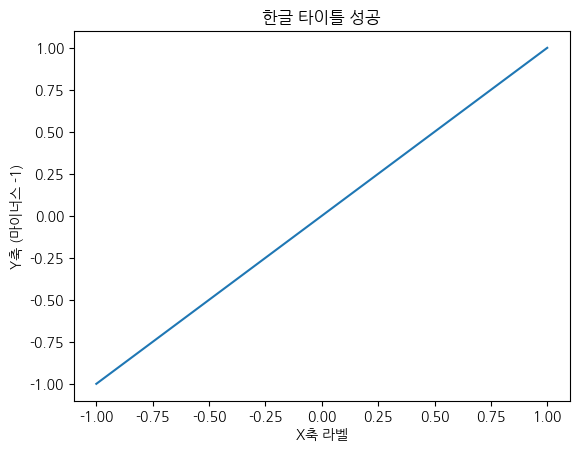

테스트 플롯 생성 완료. 한글과 마이너스 기호가 보이면 성공입니다.


In [2]:
# [3단계] 폰트 설정 및 테스트 (런타임 다시 시작 *후에* 실행)
import matplotlib.pyplot as plt

print("1. 폰트 설정을 'NanumGothic'으로 적용합니다...")
try:
    # 런타임이 다시 시작되었으므로 폰트를 찾을 수 있어야 합니다.
    plt.rc('font', family='NanumGothic')
    plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지
    print("폰트 설정 적용 완료.")

    # 2. 한글 테스트 플롯 생성
    print("2. 한글 테스트 플롯을 생성합니다.")
    plt.figure()
    plt.title('한글 타이틀 성공')
    plt.xlabel('X축 라벨')
    plt.ylabel('Y축 (마이너스 -1)')
    plt.plot([-1, 0, 1], [-1, 0, 1])
    plt.show()
    print("테스트 플롯 생성 완료. 한글과 마이너스 기호가 보이면 성공입니다.")

except Exception as e:
    print(f"폰트 설정 또는 테스트 플롯 생성 중 오류 발생: {e}")
    print("1단계 셀 실행과 [런타임 다시 시작]을 올바르게 수행했는지 다시 확인하세요.")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# 저장할 경로 설정
save_dir = "/content/drive/MyDrive/physionet_circor_1.0.3"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
root_dir = save_dir +'/physionet.org/files/circor-heart-sound/1.0.3/'
all_wav = glob(root_dir +'/training_data/*.wav')

In [5]:
len(all_wav)

3163

In [6]:
all_wav[:3]

['/content/drive/MyDrive/physionet_circor_1.0.3/physionet.org/files/circor-heart-sound/1.0.3//training_data/85340_MV.wav',
 '/content/drive/MyDrive/physionet_circor_1.0.3/physionet.org/files/circor-heart-sound/1.0.3//training_data/85338_PV.wav',
 '/content/drive/MyDrive/physionet_circor_1.0.3/physionet.org/files/circor-heart-sound/1.0.3//training_data/85338_AV.wav']

In [7]:
import pandas as pd

# ID와 타입 추출
ids_types = [path.split('/')[-1][:-4].split('_') for path in all_wav]
ids_types[:3]

[['85340', 'MV'], ['85338', 'PV'], ['85338', 'AV']]

In [8]:
df = pd.DataFrame(ids_types, columns=['ID', 'Type','num'])
df

,ID,Type,num
0,85340,MV,None
1,85338,PV,None
2,85338,AV,None
3,85335,AV,None
4,85341,AV,None
...,...,...,...
3158,49638,MV,None
3159,49776,AV,None
3160,49776,MV,None
3161,49683,PV,None


In [9]:
# keep=False 모든 중복된값 표
duplicated_ids = df[df.duplicated(['ID', 'Type'], keep=False)].sort_values(['ID', 'Type','num'])
duplicated_ids

,ID,Type,num
1575,49748,AV,1
1579,49748,AV,2
1587,49748,PV,1
1571,49748,PV,2
1627,49952,MV,1
1612,49952,MV,2
2752,50032,TV,1
2721,50032,TV,2
1089,50115,PV,1
1095,50115,PV,2


In [10]:
# 각 (ID, Type) 조합별 개수 세기
counts = df.groupby(['ID', 'Type']).size()
multi = counts[counts > 1]

# 각 조합의 쌍 개수 = nC2 = n*(n-1)/2
pairs = (multi * (multi - 1) / 2).sum()

print("중복된 (ID, Type) 쌍의 총 개수:", int(pairs))

중복된 (ID, Type) 쌍의 총 개수: 23


--- Type별 파일 개수 ---
Type
MV     861
AV     800
PV     766
TV     732
Phc      4
Name: count, dtype: int64




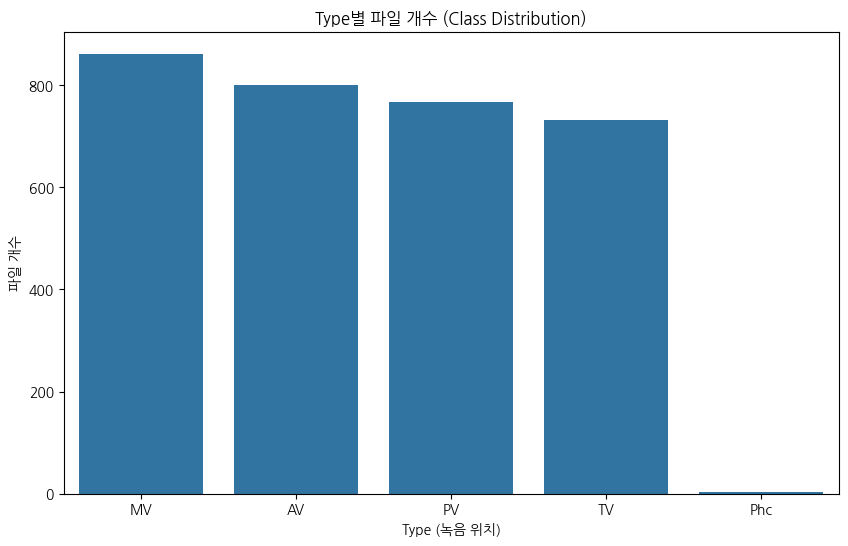

In [11]:
import seaborn as sns

# 1. df에서 Type별 개수 카운트
type_counts = df['Type'].value_counts()
print("--- Type별 파일 개수 ---")
print(type_counts)
print("\n")

# 2. 막대 그래프(Bar Plot)로 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type', order=type_counts.index) # Seaborn 사용 시
plt.title('Type별 파일 개수 (Class Distribution)')
plt.xlabel('Type (녹음 위치)')
plt.ylabel('파일 개수')
plt.show()

총 3163개 파일 분석 시작...


  0%|          | 0/3163 [00:00<?, ?it/s]

분석 완료.

--- 원본 샘플링 레이트(sr) 분포 ---
4000    3163
Name: count, dtype: int64


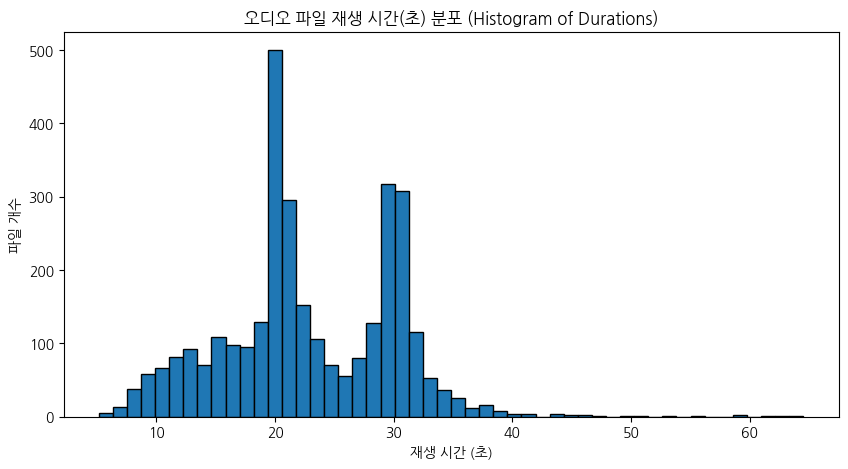


--- 재생 시간(초) 상세 통계 ---
count    3163.000000
mean       22.870301
std         7.282948
min         5.152000
25%        19.056000
50%        21.456000
75%        29.392000
max        64.512000
dtype: float64


In [12]:
import pandas as pd
import librosa
from tqdm.notebook import tqdm # 진행 상황을 보여주는 바

durations = []
sample_rates = []

print(f"총 {len(all_wav)}개 파일 분석 시작...")

# 1. 모든 파일을 순회하며 재생 시간(duration)과 샘플링 레이트(sr) 추출
for file_path in tqdm(all_wav):
    try:
        # librosa.get_duration이 파일을 통째로 안 읽고 메타데이터만 읽어 빠름
        duration = librosa.get_duration(path=file_path)
        durations.append(duration)

        # 원본 sr을 확인하기 위해 sr=None으로 로드
        y, sr = librosa.load(file_path, sr=None)
        sample_rates.append(sr)

    except Exception as e:
        durations.append(None)
        sample_rates.append(None)

print("분석 완료.")

# --- 샘플링 레이트(sr) 분석 ---
sr_series = pd.Series(sample_rates).dropna()
print("\n--- 원본 샘플링 레이트(sr) 분포 ---")
# 만약 1개 값(예: 4000)만 나오면, 모든 파일이 통일되어 있다는 뜻.
print(sr_series.value_counts())

# --- 재생 시간(Duration) 분석 ---
duration_series = pd.Series(durations).dropna()

# 2. 재생 시간 히스토그램 시각화
plt.figure(figsize=(10, 5))
plt.hist(duration_series, bins=50, edgecolor='black')
plt.title('오디오 파일 재생 시간(초) 분포 (Histogram of Durations)')
plt.xlabel('재생 시간 (초)')
plt.ylabel('파일 개수')
plt.show()

# 3. 재생 시간 상세 통계
print("\n--- 재생 시간(초) 상세 통계 ---")
# min, max, mean(평균) 값을 보고 표준 길이를 정하는 데 참고
print(duration_series.describe())

In [13]:
# 1. df에서 고유한 Type 목록 찾기
unique_types = df['Type'].unique()
print(f"발견된 고유 Type: {unique_types}")

발견된 고유 Type: ['MV' 'PV' 'AV' 'TV' 'Phc']


In [17]:
from IPython.display import Audio, display
target_type = 'MV'

# 2. df에서 Type이 'MV'인 row(행)들을 찾고, 그 중 첫 번째(index[0]) 인덱스 번호를 가져옵니다.
try:
    first_index = df[df['Type'] == target_type].index[0]

    # 3. all_wav 리스트에서 해당 인덱스 번호의 파일 경로를 뽑아냅니다.
    file_to_load = all_wav[first_index]

    print(f"--- [{target_type}] 타입의 첫 번째 파일 ---")
    print(f"파일 경로: {file_to_load}")
    print(f"파일 이름: {os.path.basename(file_to_load)}") # 파일 이름만 출력

    # 4. 뽑아낸 파일 하나를 로드하고 재생합니다.
    y, sr = librosa.load(file_to_load, sr=None)
    print(f"재생 시간: {len(y)/sr:.2f} 초")
    display(Audio(y, rate=sr))

except Exception as e:
    print(f"'{target_type}' 타입을 찾는 중 오류 발생: {e}")
    print("df['Type']에 해당 타입이 있는지 확인해 보세요.")

--- [MV] 타입의 첫 번째 파일 ---
파일 경로: /content/drive/MyDrive/physionet_circor_1.0.3/physionet.org/files/circor-heart-sound/1.0.3//training_data/85340_MV.wav
파일 이름: 85340_MV.wav
재생 시간: 20.26 초


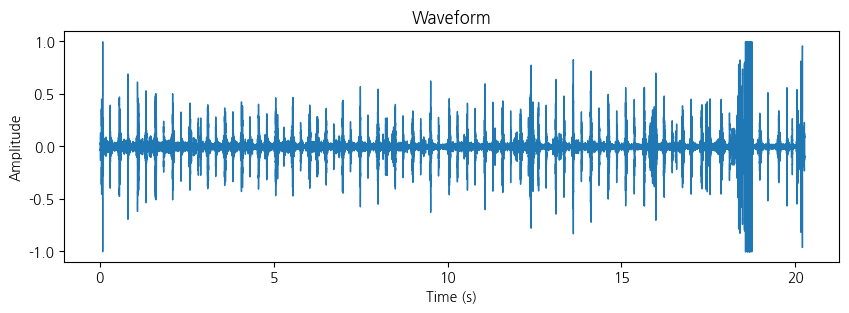

In [18]:
# ---- 2. 파형 시각화 ----
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude");

/usr/local/lib/python3.12/dist-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


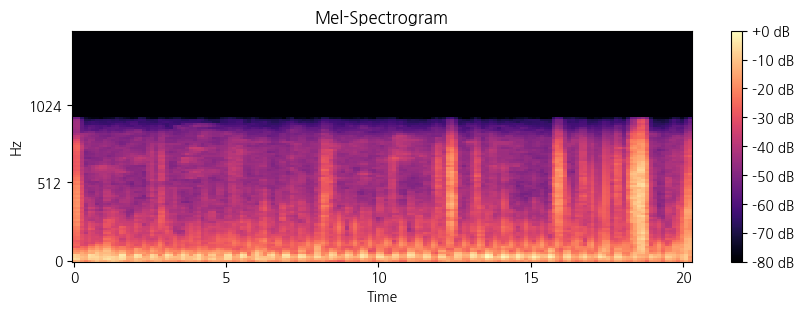

In [19]:
# 2. Mel-Spectrogram 계산
S = librosa.feature.melspectrogram(
    y = y, # 입력 오디오
    sr = sr, # 샘플링레이트
    n_mels = 128, # 멘 밴드 수 (출력 축 크기)
    fmax = 8000 # 최대 주파수 범위
)

# dB 변환(로그 스케일)
S_dB = librosa.power_to_db(S, ref = np.max) # ref = np.max -> 최대 0dB로 정규화

# 시각화
plt.figure(figsize=(10, 3))
librosa.display.specshow(S_dB, sr = sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram")
plt.show()

In [20]:
target_type = 'PV'

# 2. df에서 Type이 'PV'인 row(행)들을 찾고, 그 중 첫 번째(index[0]) 인덱스 번호를 가져옵니다.
try:
    first_index = df[df['Type'] == target_type].index[0]

    # 3. all_wav 리스트에서 해당 인덱스 번호의 파일 경로를 뽑아냅니다.
    file_to_load = all_wav[first_index]

    print(f"--- [{target_type}] 타입의 첫 번째 파일 ---")
    print(f"파일 경로: {file_to_load}")
    print(f"파일 이름: {os.path.basename(file_to_load)}") # 파일 이름만 출력

    # 4. 뽑아낸 파일 하나를 로드하고 재생합니다.
    y, sr = librosa.load(file_to_load, sr=None)
    print(f"재생 시간: {len(y)/sr:.2f} 초")
    display(Audio(y, rate=sr))

except Exception as e:
    print(f"'{target_type}' 타입을 찾는 중 오류 발생: {e}")
    print("df['Type']에 해당 타입이 있는지 확인해 보세요.")

--- [PV] 타입의 첫 번째 파일 ---
파일 경로: /content/drive/MyDrive/physionet_circor_1.0.3/physionet.org/files/circor-heart-sound/1.0.3//training_data/85338_PV.wav
파일 이름: 85338_PV.wav
재생 시간: 19.89 초


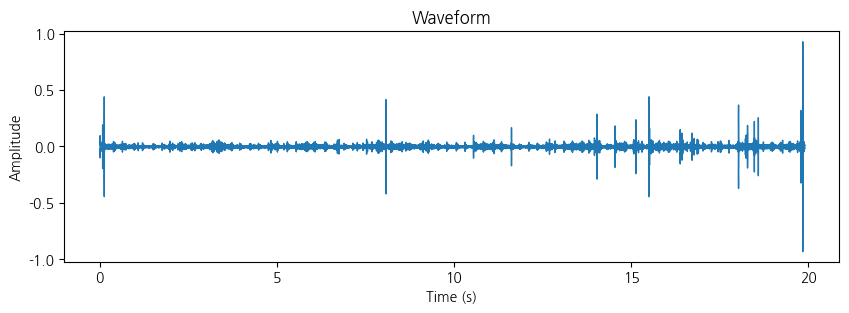

In [21]:
# ---- 2. 파형 시각화 ----
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude");

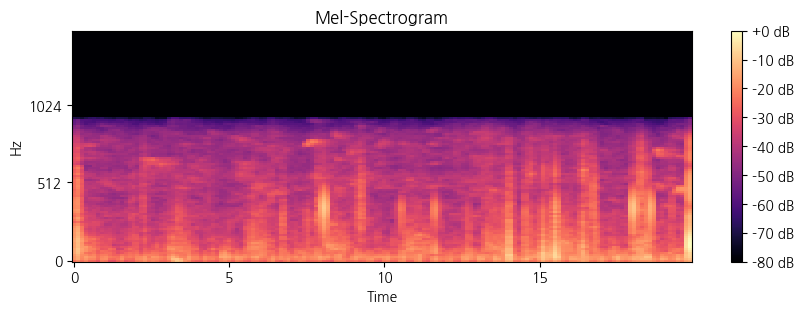

In [22]:
# 2. Mel-Spectrogram 계산
S = librosa.feature.melspectrogram(
    y = y, # 입력 오디오
    sr = sr, # 샘플링레이트
    n_mels = 128, # 멘 밴드 수 (출력 축 크기)
    fmax = 8000 # 최대 주파수 범위
)

# dB 변환(로그 스케일)
S_dB = librosa.power_to_db(S, ref = np.max) # ref = np.max -> 최대 0dB로 정규화

# 시각화
plt.figure(figsize=(10, 3))
librosa.display.specshow(S_dB, sr = sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram")
plt.show()

In [25]:
target_type = 'AV'

# 2. df에서 Type이 'AV'인 row(행)들을 찾고, 그 중 첫 번째(index[0]) 인덱스 번호를 가져옵니다.
try:
    first_index = df[df['Type'] == target_type].index[0]

    # 3. all_wav 리스트에서 해당 인덱스 번호의 파일 경로를 뽑아냅니다.
    file_to_load = all_wav[first_index]

    print(f"--- [{target_type}] 타입의 첫 번째 파일 ---")
    print(f"파일 경로: {file_to_load}")
    print(f"파일 이름: {os.path.basename(file_to_load)}") # 파일 이름만 출력

    # 4. 뽑아낸 파일 하나를 로드하고 재생합니다.
    y, sr = librosa.load(file_to_load, sr=None)
    print(f"재생 시간: {len(y)/sr:.2f} 초")
    display(Audio(y, rate=sr))

except Exception as e:
    print(f"'{target_type}' 타입을 찾는 중 오류 발생: {e}")
    print("df['Type']에 해당 타입이 있는지 확인해 보세요.")

--- [AV] 타입의 첫 번째 파일 ---
파일 경로: /content/drive/MyDrive/physionet_circor_1.0.3/physionet.org/files/circor-heart-sound/1.0.3//training_data/85338_AV.wav
파일 이름: 85338_AV.wav
재생 시간: 23.15 초


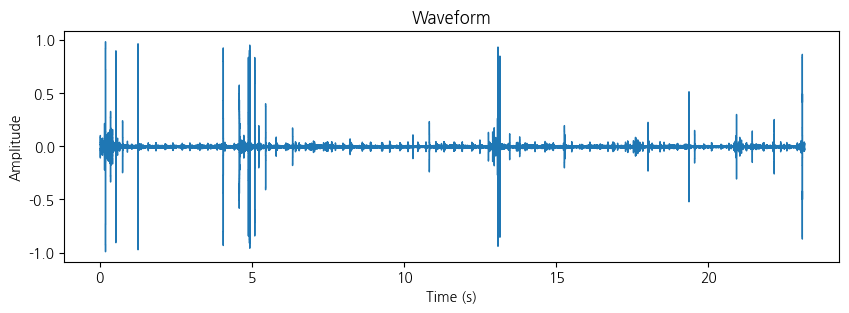

In [26]:
# ---- 2. 파형 시각화 ----
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude");

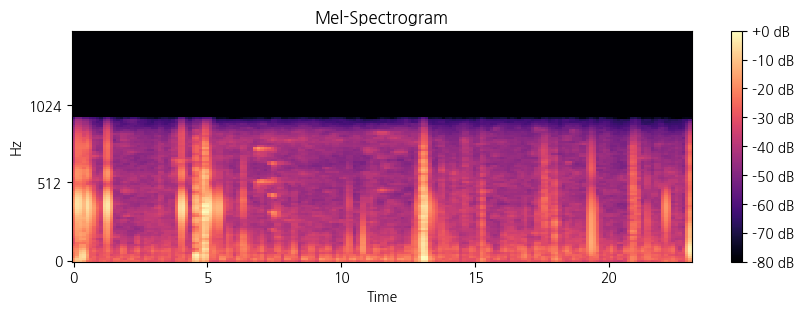

In [27]:
# 2. Mel-Spectrogram 계산
S = librosa.feature.melspectrogram(
    y = y, # 입력 오디오
    sr = sr, # 샘플링레이트
    n_mels = 128, # 멘 밴드 수 (출력 축 크기)
    fmax = 8000 # 최대 주파수 범위
)

# dB 변환(로그 스케일)
S_dB = librosa.power_to_db(S, ref = np.max) # ref = np.max -> 최대 0dB로 정규화

# 시각화
plt.figure(figsize=(10, 3))
librosa.display.specshow(S_dB, sr = sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram")
plt.show()

In [28]:
target_type = 'TV'

# 2. df에서 Type이 'TV'인 row(행)들을 찾고, 그 중 첫 번째(index[0]) 인덱스 번호를 가져옵니다.
try:
    first_index = df[df['Type'] == target_type].index[0]

    # 3. all_wav 리스트에서 해당 인덱스 번호의 파일 경로를 뽑아냅니다.
    file_to_load = all_wav[first_index]

    print(f"--- [{target_type}] 타입의 첫 번째 파일 ---")
    print(f"파일 경로: {file_to_load}")
    print(f"파일 이름: {os.path.basename(file_to_load)}") # 파일 이름만 출력

    # 4. 뽑아낸 파일 하나를 로드하고 재생합니다.
    y, sr = librosa.load(file_to_load, sr=None)
    print(f"재생 시간: {len(y)/sr:.2f} 초")
    display(Audio(y, rate=sr))

except Exception as e:
    print(f"'{target_type}' 타입을 찾는 중 오류 발생: {e}")
    print("df['Type']에 해당 타입이 있는지 확인해 보세요.")

--- [TV] 타입의 첫 번째 파일 ---
파일 경로: /content/drive/MyDrive/physionet_circor_1.0.3/physionet.org/files/circor-heart-sound/1.0.3//training_data/85341_TV.wav
파일 이름: 85341_TV.wav
재생 시간: 19.66 초


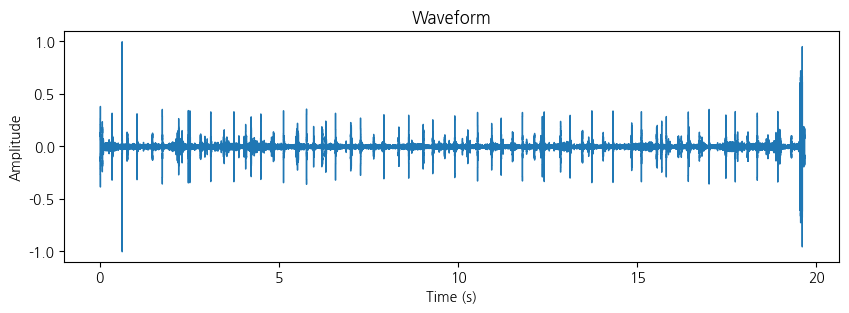

In [29]:
# ---- 2. 파형 시각화 ----
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude");

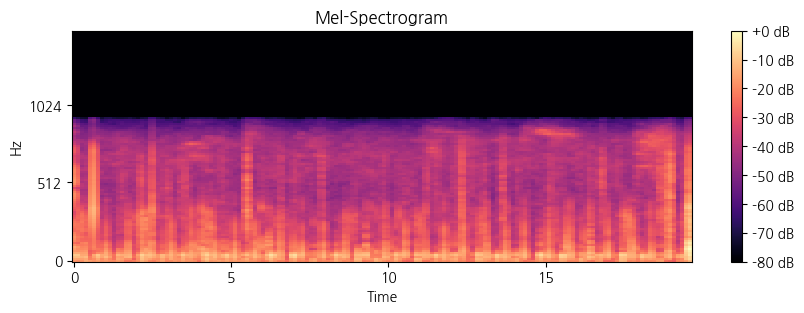

In [30]:
# 2. Mel-Spectrogram 계산
S = librosa.feature.melspectrogram(
    y = y, # 입력 오디오
    sr = sr, # 샘플링레이트
    n_mels = 128, # 멘 밴드 수 (출력 축 크기)
    fmax = 8000 # 최대 주파수 범위
)

# dB 변환(로그 스케일)
S_dB = librosa.power_to_db(S, ref = np.max) # ref = np.max -> 최대 0dB로 정규화

# 시각화
plt.figure(figsize=(10, 3))
librosa.display.specshow(S_dB, sr = sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram")
plt.show()

In [31]:
target_type = 'Phc'

# 2. df에서 Type이 'Phc'인 row(행)들을 찾고, 그 중 첫 번째(index[0]) 인덱스 번호를 가져옵니다.
try:
    first_index = df[df['Type'] == target_type].index[0]

    # 3. all_wav 리스트에서 해당 인덱스 번호의 파일 경로를 뽑아냅니다.
    file_to_load = all_wav[first_index]

    print(f"--- [{target_type}] 타입의 첫 번째 파일 ---")
    print(f"파일 경로: {file_to_load}")
    print(f"파일 이름: {os.path.basename(file_to_load)}") # 파일 이름만 출력

    # 4. 뽑아낸 파일 하나를 로드하고 재생합니다.
    y, sr = librosa.load(file_to_load, sr=None)
    print(f"재생 시간: {len(y)/sr:.2f} 초")
    display(Audio(y, rate=sr))

except Exception as e:
    print(f"'{target_type}' 타입을 찾는 중 오류 발생: {e}")
    print("df['Type']에 해당 타입이 있는지 확인해 보세요.")

--- [Phc] 타입의 첫 번째 파일 ---
파일 경로: /content/drive/MyDrive/physionet_circor_1.0.3/physionet.org/files/circor-heart-sound/1.0.3//training_data/50216_Phc_1.wav
파일 이름: 50216_Phc_1.wav
재생 시간: 5.68 초


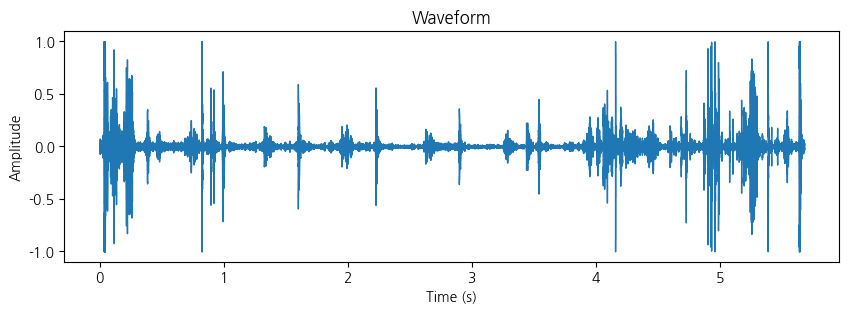

In [32]:
# ---- 2. 파형 시각화 ----
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude");

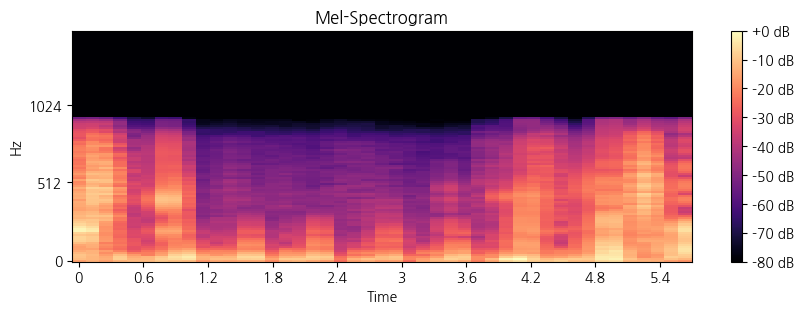

In [33]:
# 2. Mel-Spectrogram 계산
S = librosa.feature.melspectrogram(
    y = y, # 입력 오디오
    sr = sr, # 샘플링레이트
    n_mels = 128, # 멘 밴드 수 (출력 축 크기)
    fmax = 8000 # 최대 주파수 범위
)

# dB 변환(로그 스케일)
S_dB = librosa.power_to_db(S, ref = np.max) # ref = np.max -> 최대 0dB로 정규화

# 시각화
plt.figure(figsize=(10, 3))
librosa.display.specshow(S_dB, sr = sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram")
plt.show()

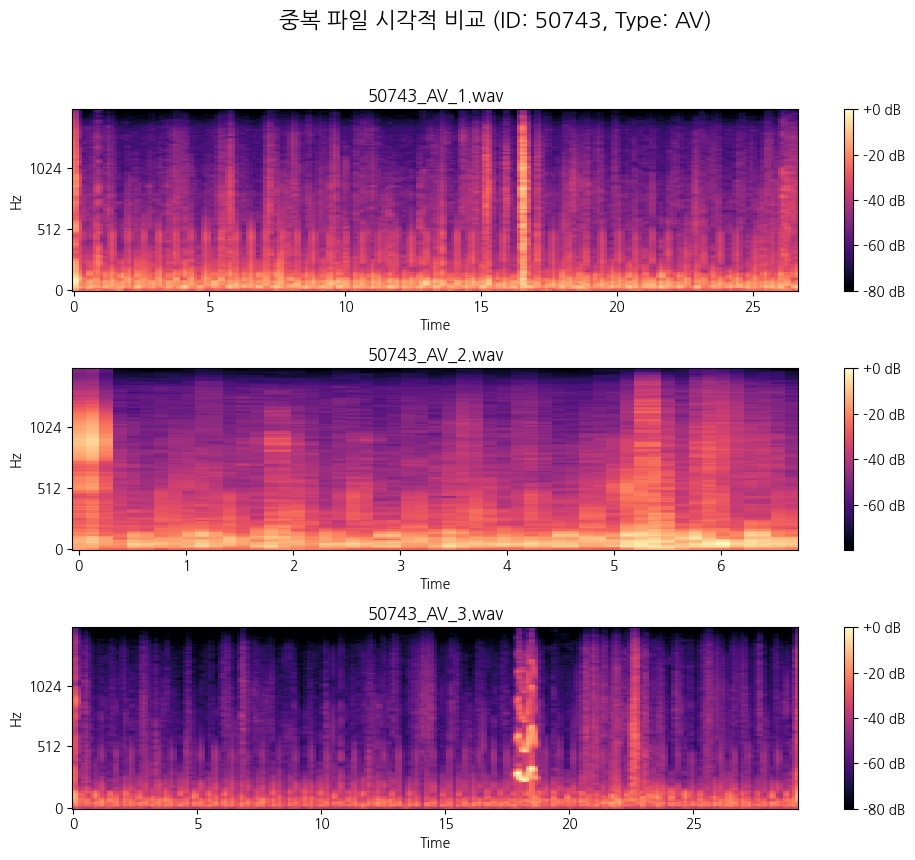

In [34]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import os

# 1. 비교할 중복 파일 목록
# (파일 경로는 all_wav에서 직접 찾거나, df를 기반으로 만들어야 합니다)
# 이전에 all_wav를 생성한 root_dir 변수가 살아있다고 가정합니다.
files_to_compare = [
    root_dir + '/training_data/50743_AV_1.wav',
    root_dir + '/training_data/50743_AV_2.wav',
    root_dir + '/training_data/50743_AV_3.wav'
]

# 2. 3개의 서브플롯 생성
fig, axes = plt.subplots(nrows=len(files_to_compare), ncols=1, figsize=(10, 9))
fig.suptitle('중복 파일 시각적 비교 (ID: 50743, Type: AV)', fontsize=16)

# 3. 각 파일을 순회하며 스펙트로그램 그리기
for i, file_path in enumerate(files_to_compare):

    # (A) 파일 존재 확인
    if not os.path.exists(file_path):
        print(f"파일을 찾을 수 없습니다: {file_path}")
        axes[i].set_title(f"파일 없음: {os.path.basename(file_path)}")
        continue

    # (B) 로드 및 스펙트로그램 변환
    y, sr = librosa.load(file_path, sr=None)
    S_DB = librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128), ref=np.max)

    # (C) 서브플롯에 그리기
    img = librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel', ax=axes[i])
    axes[i].set_title(os.path.basename(file_path))
    fig.colorbar(img, ax=axes[i], format='%+2.0f dB')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Main title과 겹치지 않게 조절
plt.show()